## Análisis exploratorio: **Predicción del rango de precios para dispositivos móviles**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
df = pd.read_csv('data_mobile_price_range.csv')

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
# El dataset no contiene valores nulos pero si se visualizá (a través de los histogramas) 
# que hay features con valores igual a cero o muy bajos, lo que no tiene sentido.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Se grafica la distribución de los datos

Text(0.5, 1.0, 'Histograma Rango de precio celular vs cantidad')

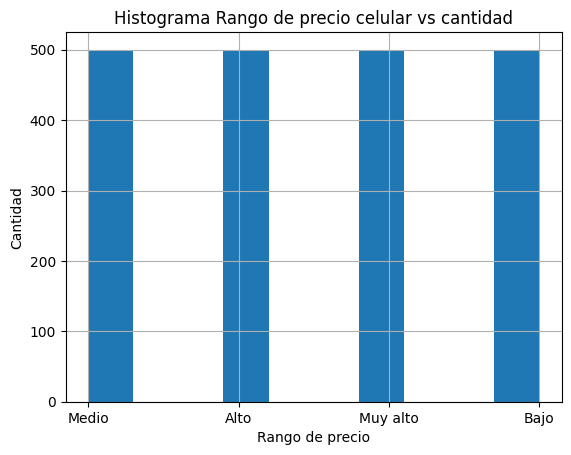

In [5]:
# Se observa que la columna target (price_range) está perfectamente distribuida

mapping = {0:'Bajo', 1:'Medio', 2:'Alto', 3:'Muy alto'}
df['price_range'].map(mapping).hist()


plt.xlabel('Rango de precio')
plt.ylabel('Cantidad')
plt.title('Histograma Rango de precio celular vs cantidad')

## Se grafíca todas las columnas
Se toma ventaja de que no son demasiadas

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

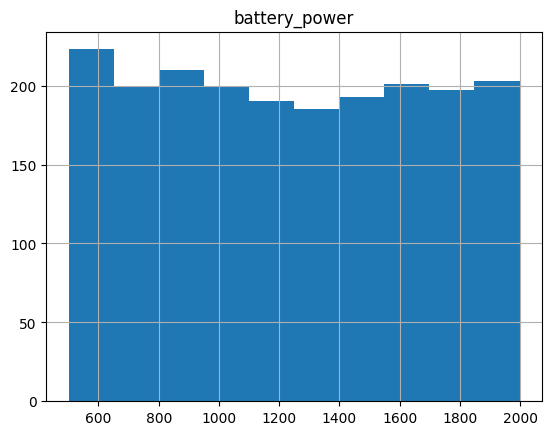

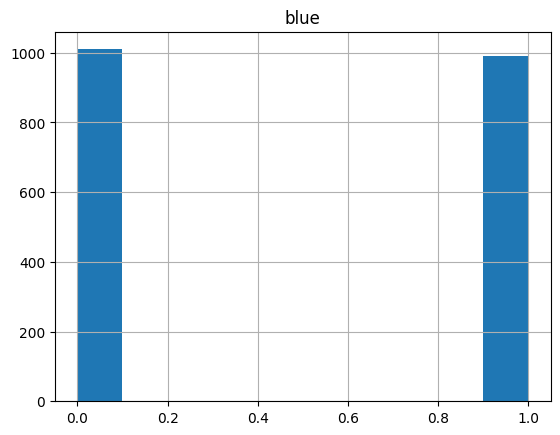

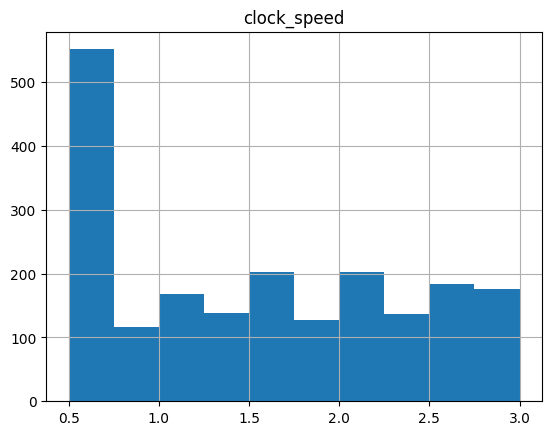

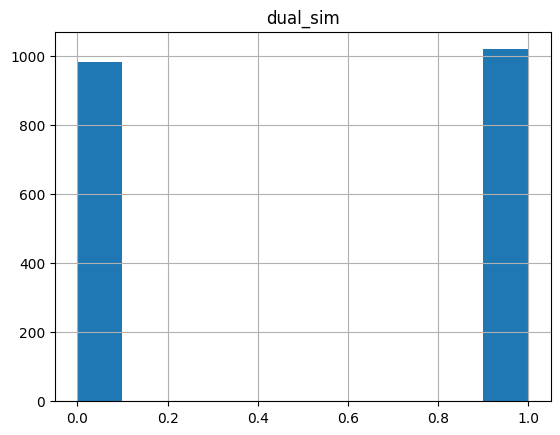

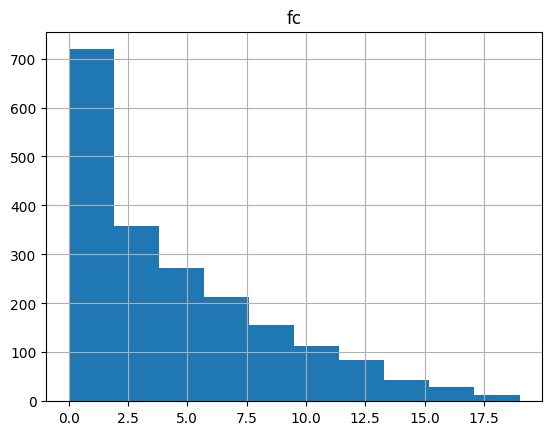

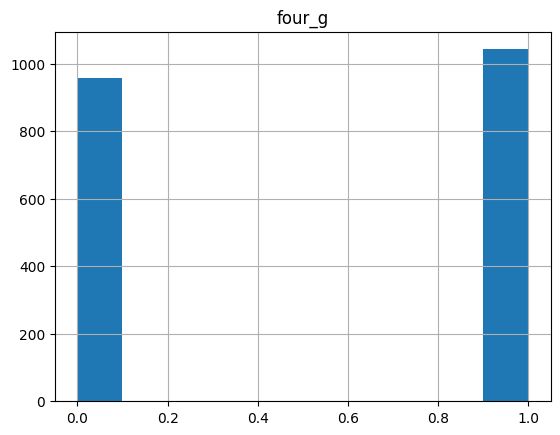

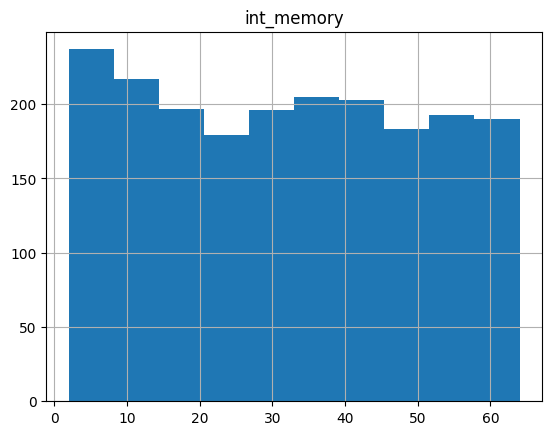

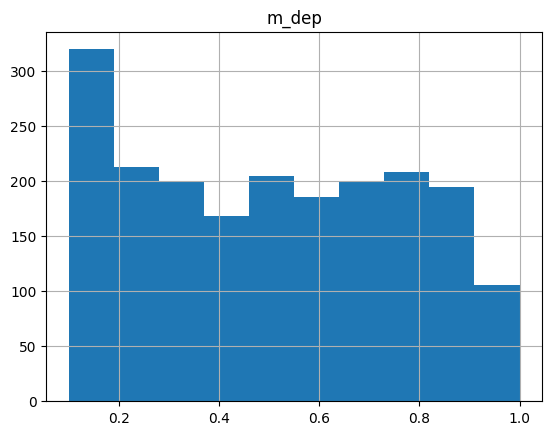

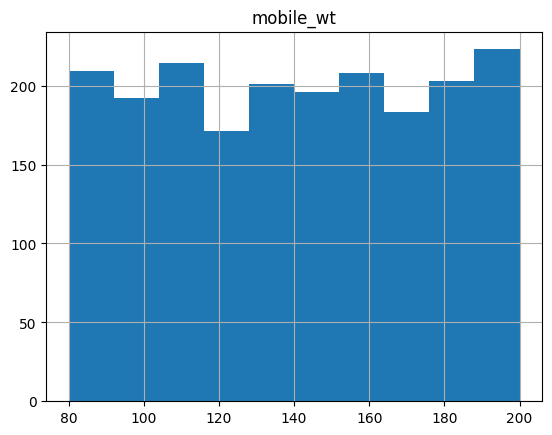

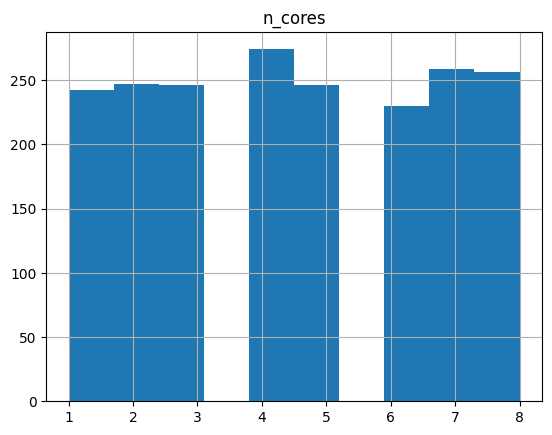

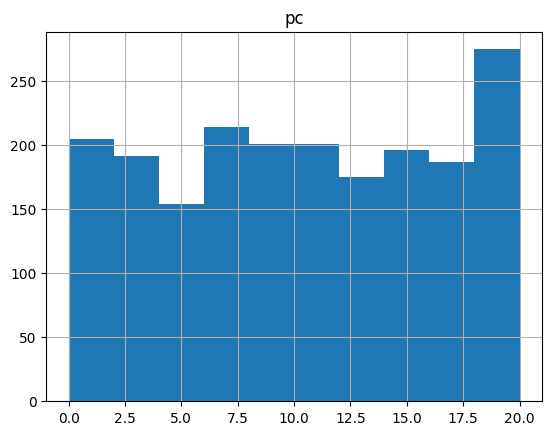

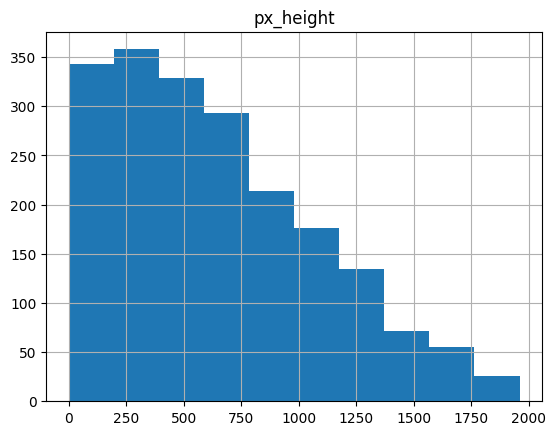

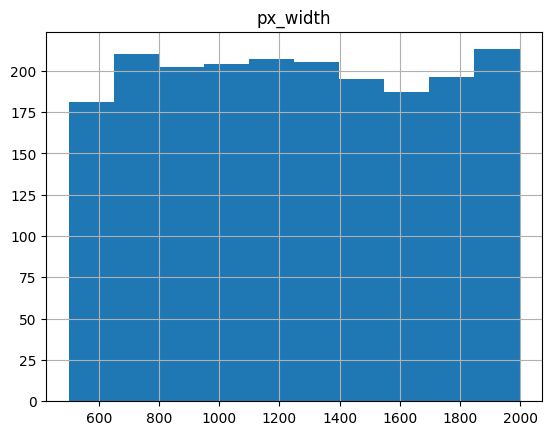

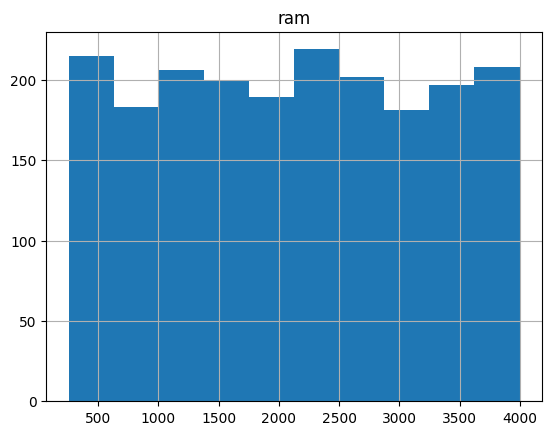

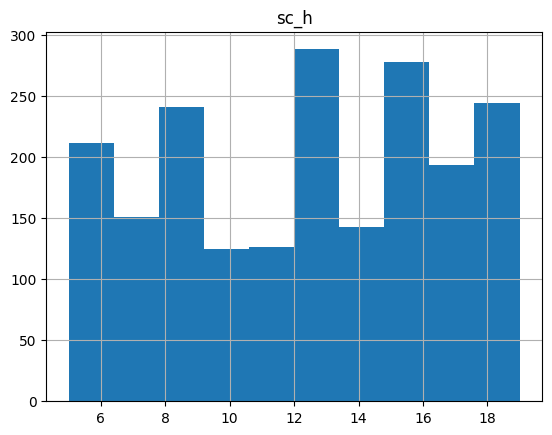

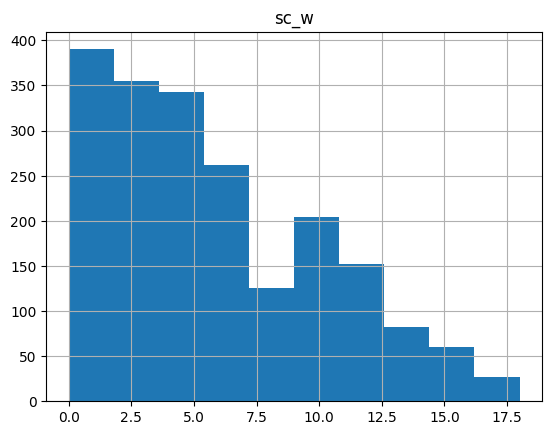

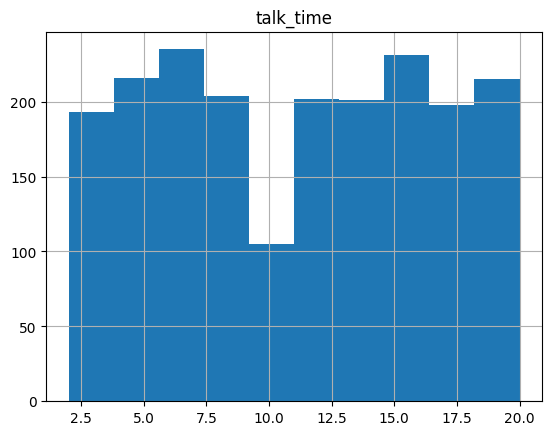

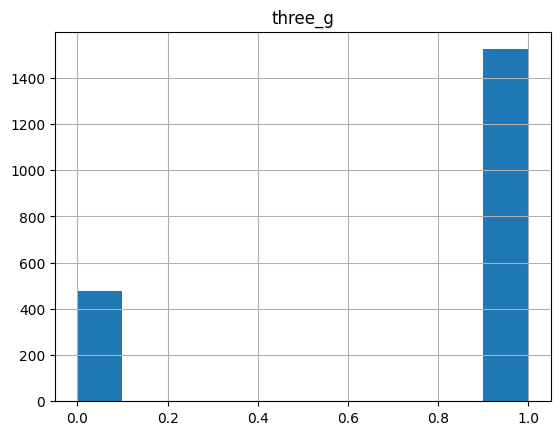

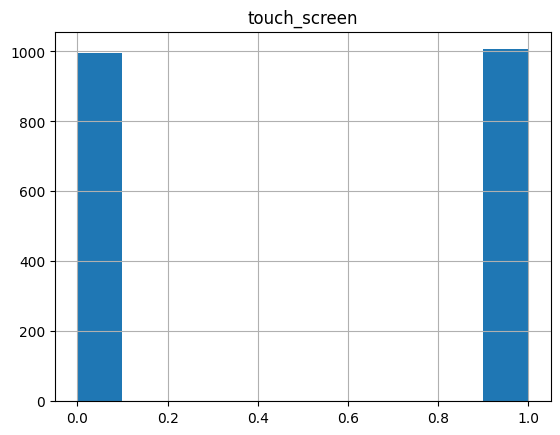

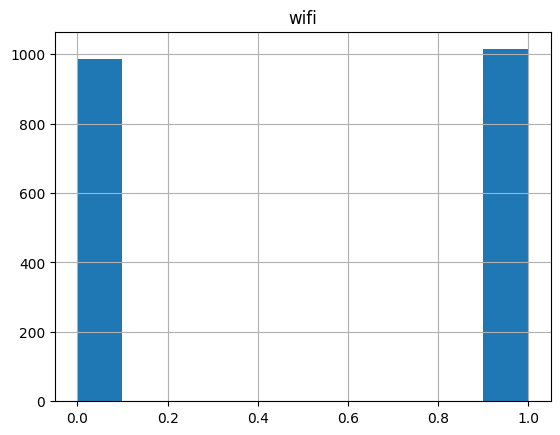

In [7]:
for column in df.columns[:-1]:
    df[column].hist()
    plt.title(column)
    plt.show()

> Se observa que existen varias columnas que pueden tratarse de manera categórica como: 

blue (bluetooth), dual_sim, four_g (4G), three_g (3G), touch_screen, wifi.

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
categorical_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']


In [10]:
df[categorical_cols] = df[categorical_cols].astype('O')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [11]:
# Se elimina de algunas features numéricas las filas que tengan valores nulos

features_non_zero = ['battery_power', 'clock_speed', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time']
(df[features_non_zero] == 0).sum()

battery_power      0
clock_speed        0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
dtype: int64

In [12]:
df = df[(df[features_non_zero] > 0).all(axis=1)]

In [13]:
# Se elimina filas que tengan una relación de aspecto en la resolución 
# de la pantalla demasiado grande
df = df[(df['px_width']/df['px_height']) <= 20]

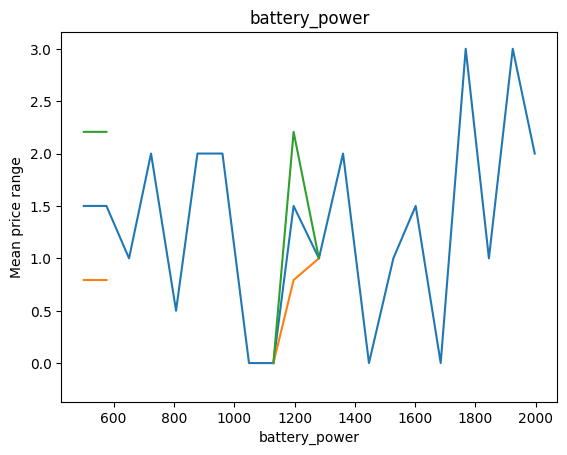

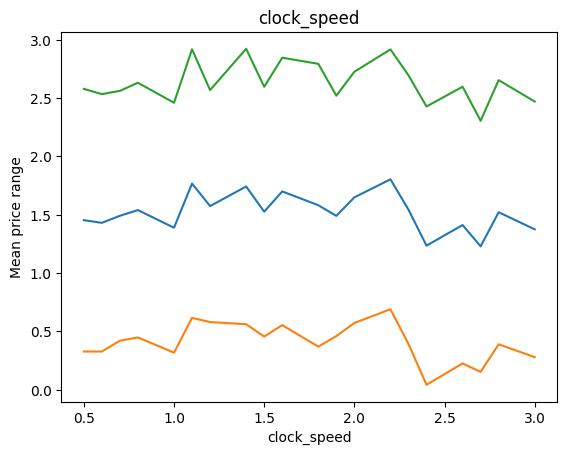

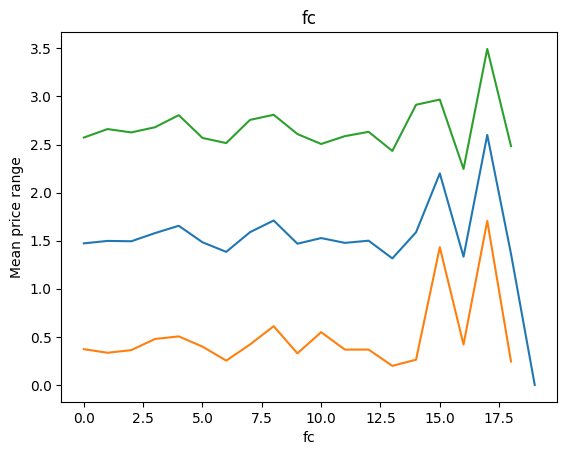

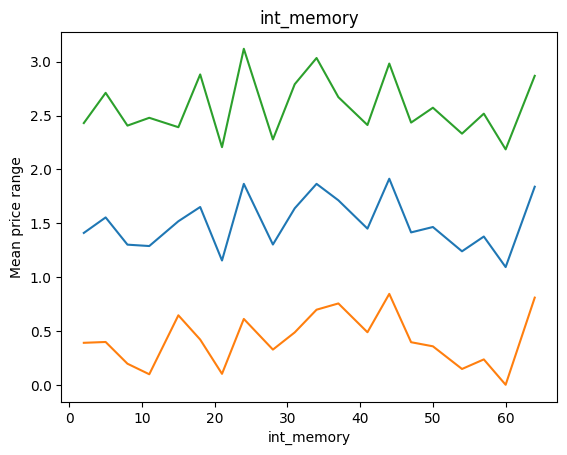

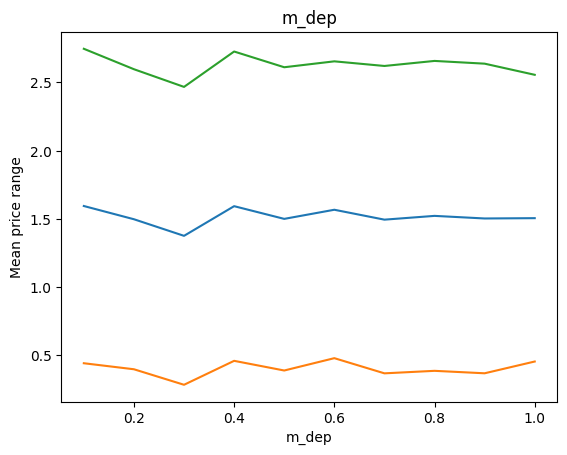

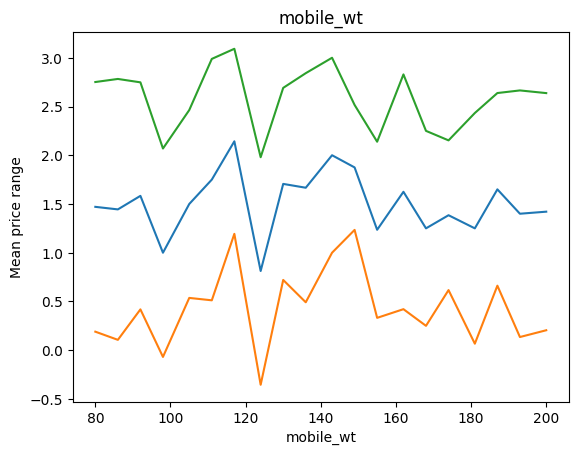

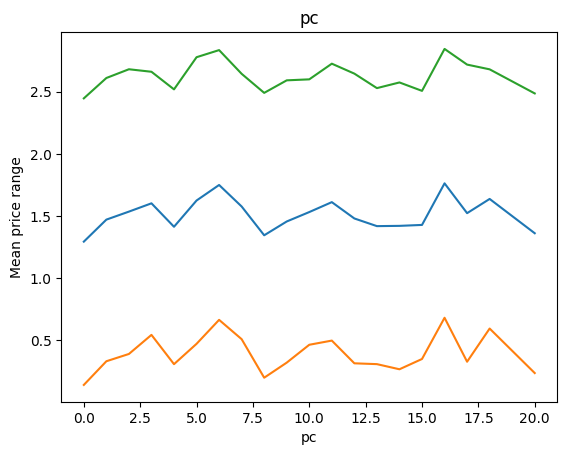

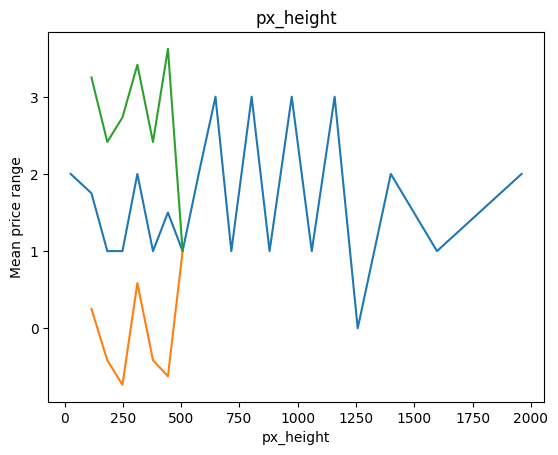

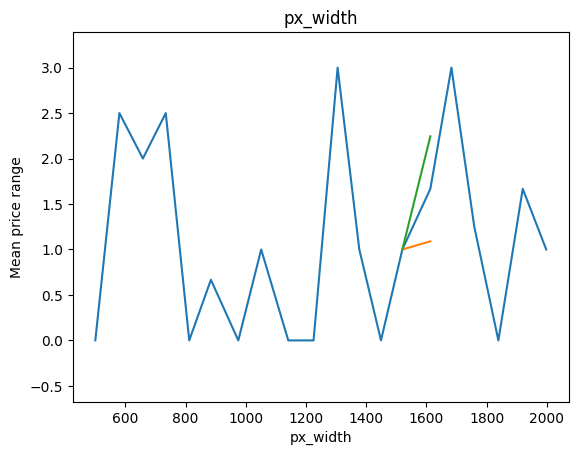

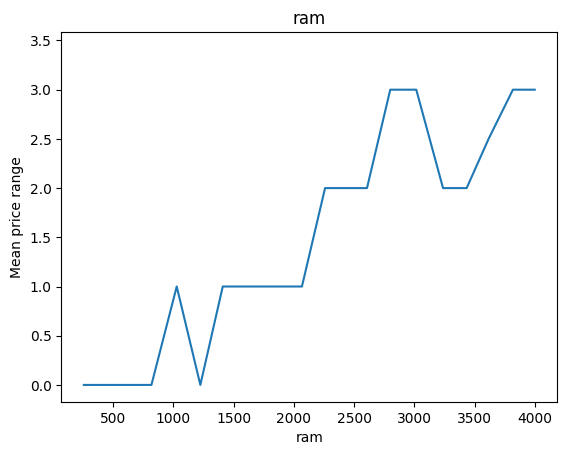

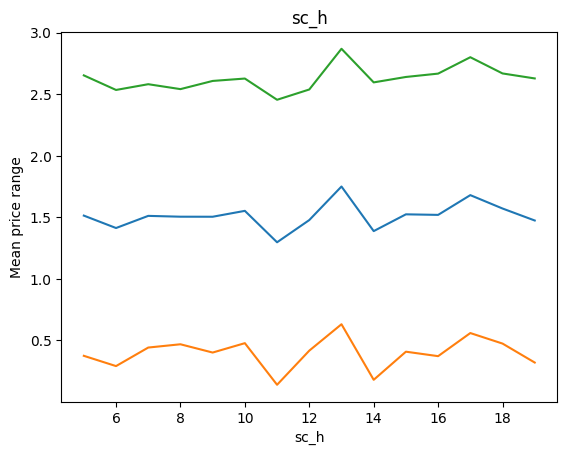

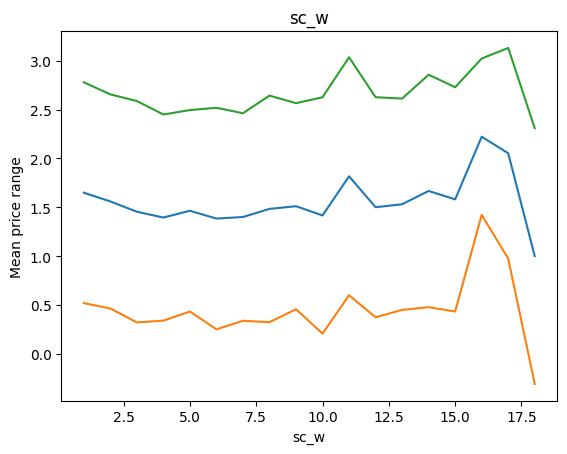

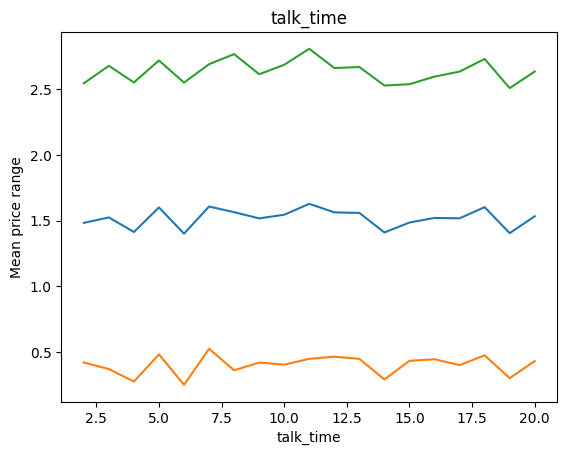

In [14]:
# Se visualiza los valores de cada column contra sus valores promedio 
# y desv. estandar de rango de precio

numerical_columns = df.columns[:-1].drop(categorical_cols)

for column in numerical_columns:
    
    aggregation = df.groupby(column)['price_range'].mean()
    standard = df.groupby(column)['price_range'].std()

    total_rows = len(aggregation)
    indices = np.linspace(0, total_rows - 1, 20, dtype=int)

    aggregation.iloc[indices].plot()
    (aggregation - standard).iloc[indices].plot()
    (aggregation + standard).iloc[indices].plot()

    plt.ylabel('Mean price range')
    plt.title(column)
    plt.show()

### Features categoricas

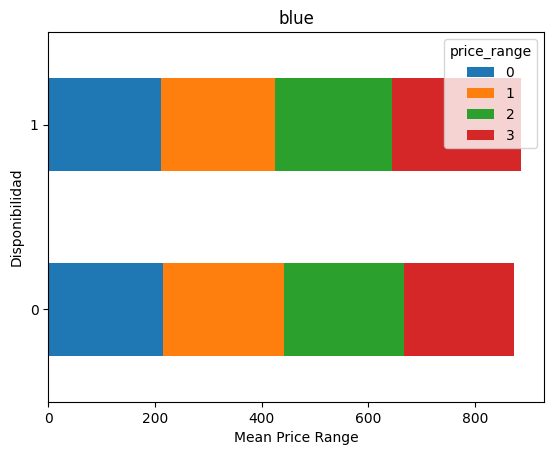

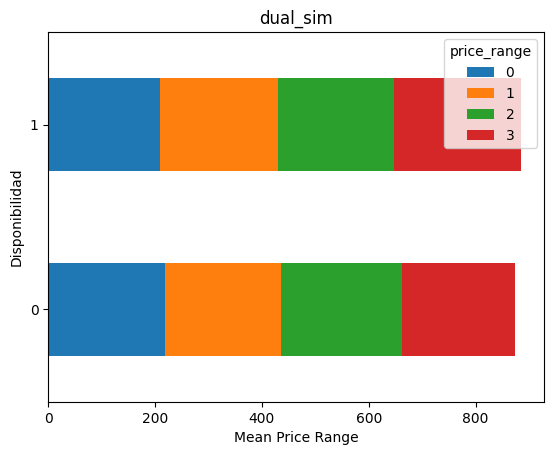

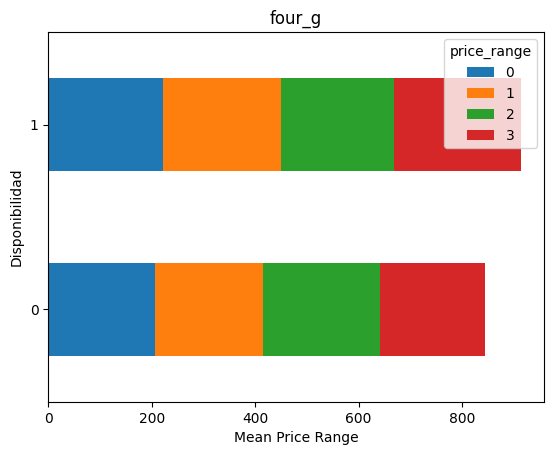

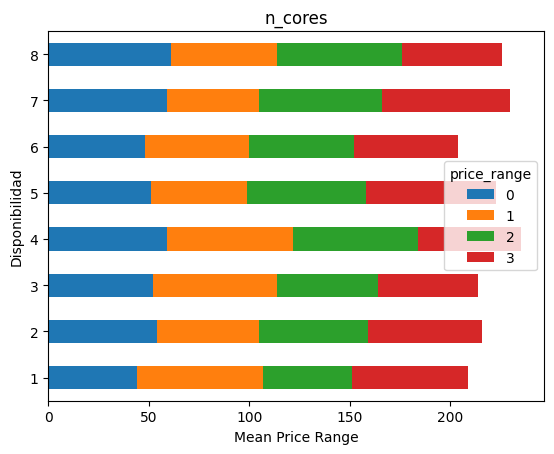

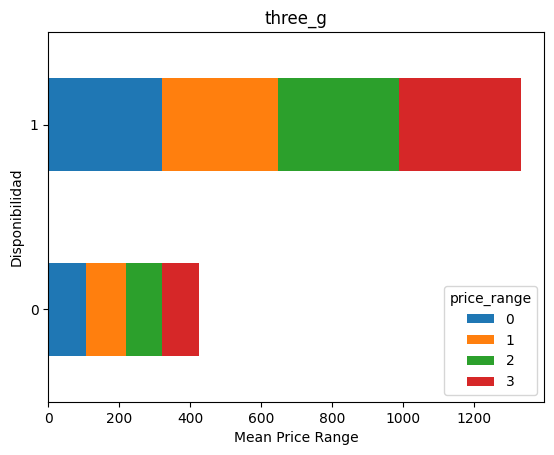

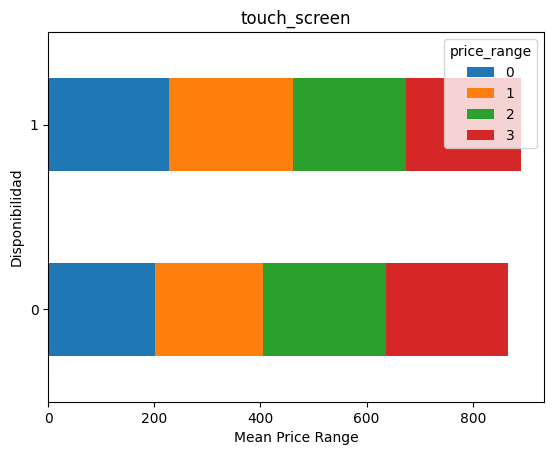

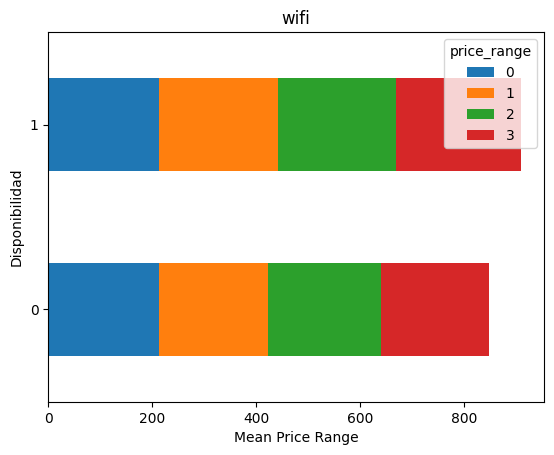

In [15]:
for column in categorical_cols:

    pd.crosstab(df[column], df['price_range']).plot(kind='barh', stacked=True)

    plt.ylabel('Disponibilidad')
    plt.xlabel('Mean Price Range')
    plt.title(column)
    plt.show()

Lo anterior muestra que pocas **features** guardan correlación con los rangos de precio, siendo la **memoria RAM** la única que muestra una relación clara.
La mayoría de **features** muestran estar muy distribuidas para todos los rangos de precio, por tanto no se descarta ninguna hasta ahora.

### Análisis correlación entre features numéricas

<Axes: >

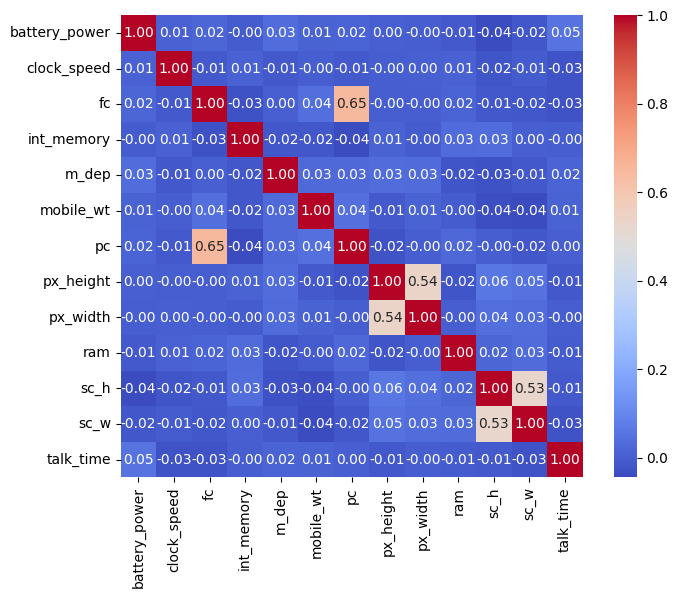

In [16]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

> Contrario a lo esperable, únicamente hay correlaciones entre features relacionadas a dimensiones del dispositivo.

### Feature Engineering

A partir de las features existentes podemos crear features que hagan más sentido, es inusual que sea reelevante la altura y ancho en pixeles de la pantalla, por otro lado puede ser más reelevante la relación de aspecto entre ellas, o la cantidad total de pixeles (no un número específico, si no simplemente el hecho de tener más pixeles una pantalla que otra o ser más densa).

In [17]:
df_fe = df.copy() #Se crea copia para modificar libremente sus features

In [18]:
num_pix = (df_fe['px_width']*df_fe['px_height'])
num_pix.describe()

count    1.757000e+03
mean     9.399905e+05
std      8.304925e+05
min      1.320800e+04
25%      2.855450e+05
50%      6.545580e+05
75%      1.401565e+06
max      3.886306e+06
dtype: float64

In [19]:
aspect_ratio = ((df_fe['sc_w']/df_fe['sc_h']))
aspect_ratio.describe()

count    1757.000000
mean        0.504002
std         0.263114
min         0.052632
25%         0.277778
50%         0.500000
75%         0.727273
max         0.947368
dtype: float64

In [20]:
# Features ya usadas
df_fe = df_fe.drop(['px_width','px_height','sc_w', 'sc_h'], axis=1)
#Features con poca importancia según análisis 
df_fe = df_fe.drop(['wifi', 'touch_screen', 'four_g', 'dual_sim', 'blue', 'three_g'], axis=1)

In [21]:
df_fe['num_pix'] = num_pix
df_fe['aspect_ratio'] = aspect_ratio

### Creación de conjuntos de datos

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df_fe.drop(['price_range'], axis=1), 
    df_fe['price_range'], 
    test_size=0.1, 
    random_state=0,
)

#### Escalado

Se escala los datos dado que existen features que pueden alcanzar valores altos a comparación de otras.

In [23]:
scaler = MinMaxScaler()

# Se crea el escalado únicamente usando el conjunto de entrenamiento
scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [24]:
X_train.to_csv('./Datasets/xtrain.csv', index=False)
X_test.to_csv('./Datasets/xtest.csv', index=False)

y_train.to_csv('./Datasets/ytrain.csv', index=False)
y_test.to_csv('./Datasets/ytest.csv', index=False)